# Configurar nuestro entorno

Para practicar el escalado y la normalización, usaremos un [conjunto de datos de campañas de Kickstarter] (Kickstarter es un sitio web donde las personas pueden pedirles que inviertan en varios proyectos y productos conceptuales).

La siguiente celda de código se carga en las bibliotecas y el conjunto de datos que usaremos.

In [18]:
# !pip install mlxtend

In [19]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [20]:
path = "/Users/lolonastri/Desktop/POO_UCEMA/machine_learning/2-escalado_normalizacion/practica/ks-projects-201801.csv"
kickstarters_2017 = pd.read_csv(path)


kickstarters_2017

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


___

Empecemos por escalar los objetivos de cada campaña, que es cuánto dinero pedían. Después de escalar, todos los valores se encuentran entre 0 y 1.

In [21]:
# seleccionar la columna usd_goal_real
original = kickstarters_2017["usd_goal_real"]

# Convierte la columna en un arreglo NumPy
original_array = np.array(original).reshape(-1, 1)

# escalar goals entre 0 y 1
scaled_data = minmax_scaling(original_array, columns=[0])

# Convierte el resultado en un DataFrame de Pandas
scaled_data = pd.DataFrame(scaled_data, columns=["usd_goal_real"])

print('Original data\nPreview:\n', original.head())
print('Minimum value:', original.min(),
      '\nMaximum value:', original.max())
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:',scaled_data.min() ,
      '\nMaximum value:', scaled_data.max())

Original data
Preview:
 0     1533.95
1    30000.00
2    45000.00
3     5000.00
4    19500.00
Name: usd_goal_real, dtype: float64
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: usd_goal_real    0.0
dtype: float64 
Maximum value: usd_goal_real    1.0
dtype: float64


<Axes: >

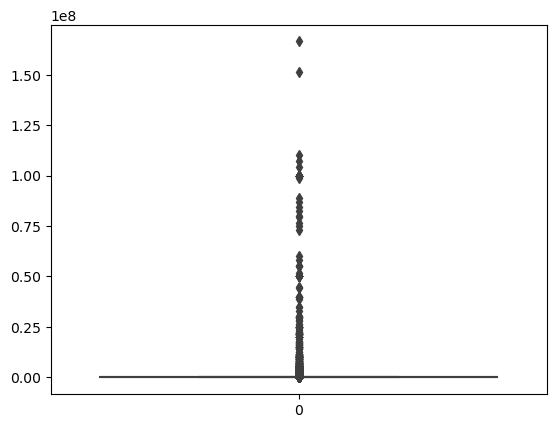

In [22]:
sns.boxplot(data = original)

<Axes: >

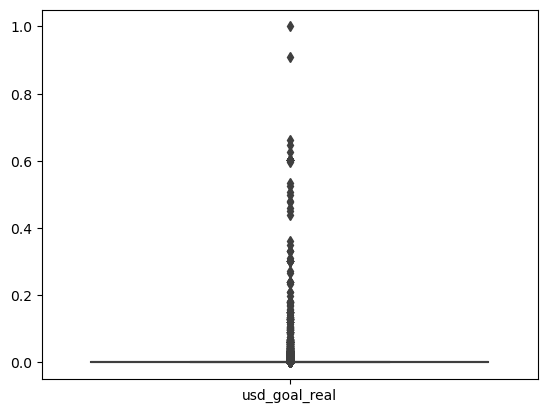

In [23]:
sns.boxplot(data = scaled_data)

___

# 1) Practica el escalado

Acabamos de escalar la columna "usd_goal_real". ¿Qué pasa con la columna "objetivo"?

Comience ejecutando la siguiente celda de código para crear un DataFrame `original_goal_data` que contenga la columna "objetivo".

In [24]:
# seleccionar la columna usd_goal_real
original_goal_data = kickstarters_2017["usd_goal_real"]
original_goal_data

0          1533.95
1         30000.00
2         45000.00
3          5000.00
4         19500.00
            ...   
378656    50000.00
378657     1500.00
378658    15000.00
378659    15000.00
378660     2000.00
Name: usd_goal_real, Length: 378661, dtype: float64

Utilice `original_goal_data` para crear un nuevo DataFrame `scaled_goal_data` con valores escalados entre 0 y 1. Debe utilizar la función `minmax_scaling()`.

In [25]:
# seleccionar la columna usd_goal_real
original = kickstarters_2017["usd_goal_real"]

# Convierte la columna en un arreglo NumPy
original_array = np.array(original).reshape(-1, 1)

# escalar goals entre 0 y 1
scaled_data = minmax_scaling(original_array, columns=[0])

# Convierte el resultado en un DataFrame de Pandas
scaled_data = pd.DataFrame(scaled_data, columns=["usd_goal_real"])

print('Original data\nPreview:\n', original.head())
print('Minimum value:', original.min(),
      '\nMaximum value:', original.max())
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:',scaled_data.min() ,
      '\nMaximum value:', scaled_data.max())

Original data
Preview:
 0     1533.95
1    30000.00
2    45000.00
3     5000.00
4    19500.00
Name: usd_goal_real, dtype: float64
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: usd_goal_real    0.0
dtype: float64 
Maximum value: usd_goal_real    1.0
dtype: float64


___

# 2) Practicar la normalización

Ahora practicarás la normalización. Comenzamos normalizando la cantidad de dinero comprometida para cada campaña.

In [26]:
kickstarters_2017["usd_pledged_real"].value_counts()

usd_pledged_real
0.00        52527
1.00         6678
10.00        3633
25.00        3455
50.00        2937
            ...  
22321.00        1
53.43           1
21880.00        1
454.11          1
2875.83         1
Name: count, Length: 106065, dtype: int64

In [35]:
# obtener el índice de todas las promesas positivas (Box-Cox solo toma valores positivos)
index_of_positive__usd_pledges = kickstarters_2017["usd_pledged_real"] > 0

# obtenga solo promesas positivas (usando sus índices)
positive_usd_pledges = kickstarters_2017["usd_pledged_real"].loc[index_of_positive__usd_pledges]

# normalizar las promesas (w/ Box-Cox)
normalized_usd_pledges = stats.boxcox(positive_usd_pledges)[0]

print('Original data\nPreview:\n', positive_usd_pledges.head())
print('Minimum value:', positive_usd_pledges.min(),
      '\nMaximum value:', positive_usd_pledges.max())
print('_'*30)

print('\nNormalized data\nPreview:\n', pd.DataFrame(normalized_usd_pledges).head())
print('Minimum value:', normalized_usd_pledges.min(),
      '\nMaximum value:', normalized_usd_pledges.max())

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
            0
0  10.165142
1   6.468598
2   0.000000
3   9.129277
4  15.836853
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


¡Los valores han cambiado significativamente con la normalización!

En la siguiente celda de código, observará la distribución de los datos normalizados, donde ahora debería parecerse a una distribución normal.

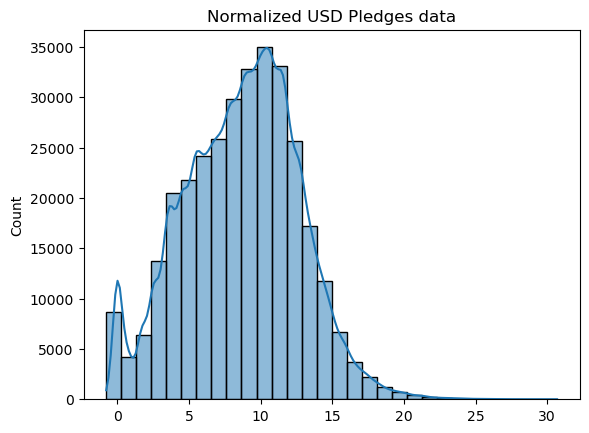

In [36]:
# graficar datos normalizados
ax = sns.histplot(normalized_usd_pledges, kde=True, bins=30)
ax.set_title("Normalized USD Pledges data")
plt.show()

___

## Usamos la columna "usd_pledged_real". Siga el mismo proceso para normalizar la columna "prometida".

In [37]:
kickstarters_2017["pledged"].value_counts()

pledged
0.00         52527
1.00          9195
10.00         5034
25.00         3994
50.00         3626
             ...  
7079.89          1
25419.72         1
123838.00        1
11126.10         1
1732.02          1
Name: count, Length: 62130, dtype: int64

In [38]:
# obtener el índice de todas las promesas positivas (Box-Cox solo toma valores positivos)
index_of_positive_pledges = kickstarters_2017["pledged"] > 0

# obtenga solo promesas positivas (usando sus índices)
positive_pledges = kickstarters_2017["pledged"].loc[index_of_positive_pledges]

# normalizar las promesas (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', positive_pledges.min(),
      '\nMaximum value:', positive_pledges.max())
print('_'*30)

print('\nNormalized data\nPreview:\n', pd.DataFrame(normalized_pledges).head())
print('Minimum value:', normalized_pledges.min(),
      '\nMaximum value:', normalized_pledges.max())

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: pledged, dtype: float64
Minimum value: 1.0 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
            0
0  10.013887
1   6.403367
2   0.000000
3   9.005193
4  15.499596
Minimum value: 0.0 
Maximum value: 29.63030787418848


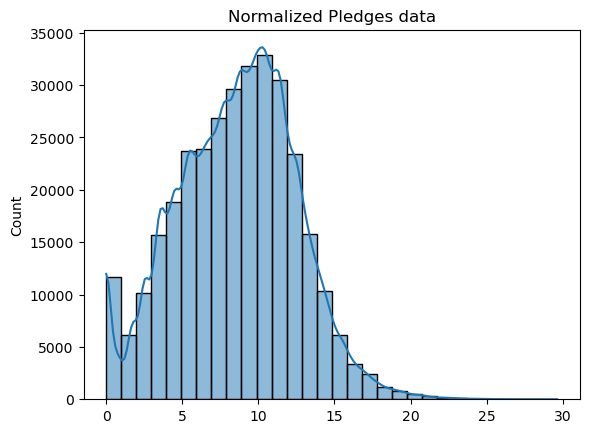

In [39]:
# graficar datos normalizados
ax = sns.histplot(normalized_pledges, kde=True, bins=30)
ax.set_title("Normalized Pledges data")
plt.show()


## ¿En qué se diferencia la columna "usd_pledged_real" normalizada de cuando normalizamos la columna "prometida"? ¿O se ven casi iguales?

### Ambas se ven casi iguales porque la columna "usd_pledged_real" es una transformación lineal de la columna "prometida". La única diferencia es que la columna "usd_pledged_real" está en dólares estadounidenses reales, mientras que la columna "prometida" está en dólares estadounidenses.